<a href="https://colab.research.google.com/github/jnn-dev/ML_Coin_Scrap/blob/main/Program8_Coin_vs_Scrap_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###################################################################
Load Datasets 
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data Directory List 1- >  ['COIN', 'SCRAP']
Data Directory List 2- >  ['COIN', 'SCRAP']
(array([0, 1]), array([400, 921]))

###################################################################
Create Model
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 99, 99, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 49, 49, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (No

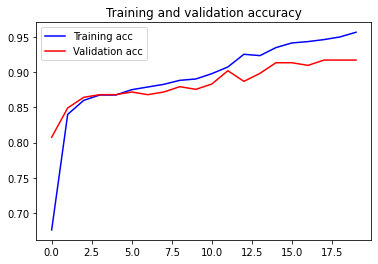

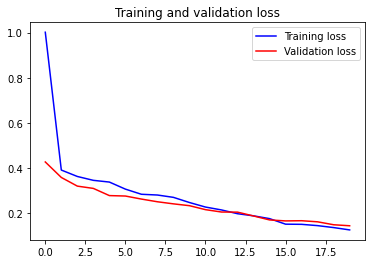


###################################################################
Test model with validation Data
9/9 [==============================] - 1s 82ms/step - loss: 0.1437 - accuracy: 0.9170
Validation accuracy - >  91.69811606407166
The predicted validation image is = SCRAP verify below


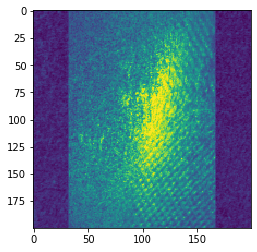

The predicted validation image is = COIN verify below


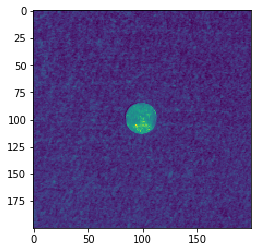

The predicted validation image is = COIN verify below


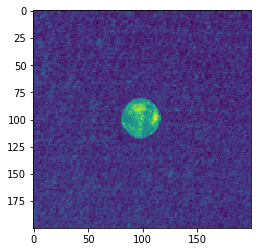

The predicted validation image is = SCRAP verify below


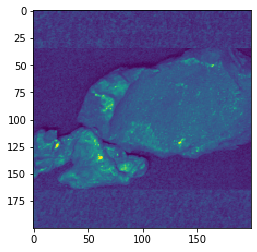

The predicted validation image is = COIN verify below


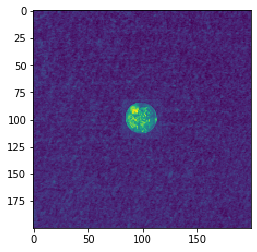

The predicted validation image is = COIN verify below


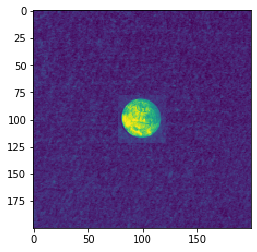

The predicted validation image is = COIN verify below


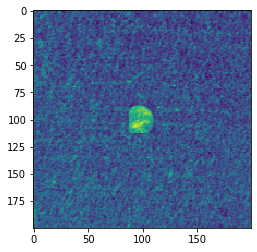

The predicted validation image is = COIN verify below


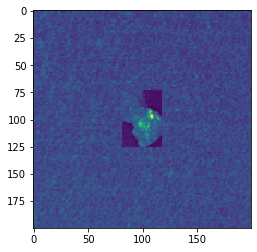

The predicted validation image is = COIN verify below


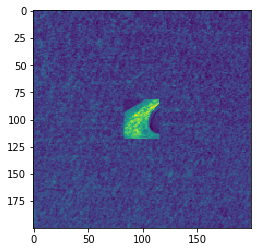

The predicted validation image is = COIN verify below


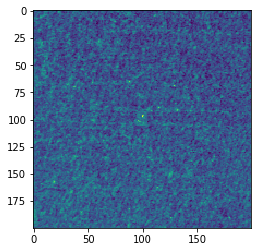


###################################################################
Test model with test Data
(array([0, 1]), array([120, 276]))
13/13 [==============================] - 1s 93ms/step - loss: 0.1053 - accuracy: 0.9470
Testing accuracy - >  94.69696879386902
The predicted testing image is = COIN verify below


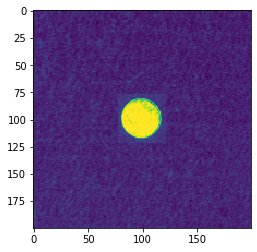

The predicted testing image is = COIN verify below


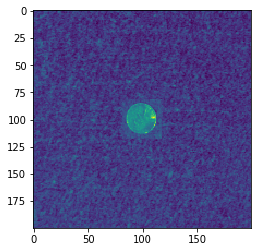

The predicted testing image is = COIN verify below


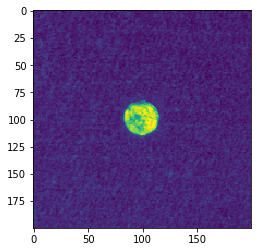

The predicted testing image is = SCRAP verify below


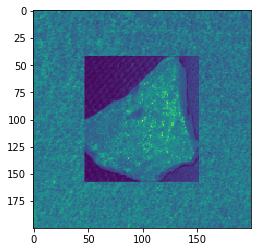

The predicted testing image is = SCRAP verify below


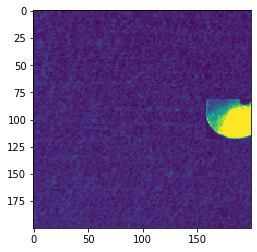

The predicted testing image is = COIN verify below


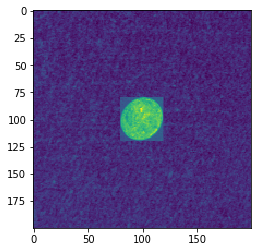

The predicted testing image is = COIN verify below


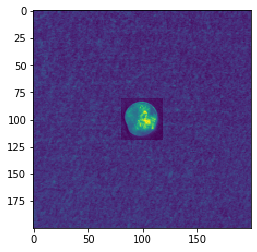

The predicted testing image is = SCRAP verify below


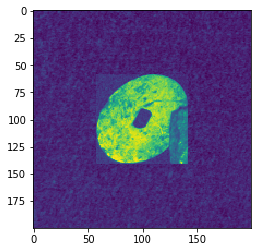

The predicted testing image is = COIN verify below


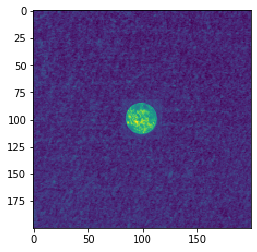

The predicted testing image is = COIN verify below


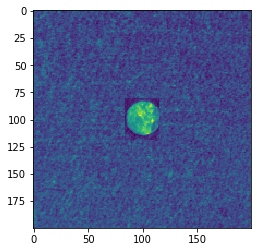

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thur Nov 7, 2019
Reference from https://github.com/anujshah1003/own_data_cnn_implementation_keras/blob/master/updated_custom_data_cnn.py
@author: Jose Tenorio
"""

import numpy as np
import tensorflow as tf
import random as rn
import os,cv2
import glob
import re
import matplotlib.pyplot as plt
import warnings
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from google.colab import drive

# Settings
os.environ['PYTHONHASHSEED'] = '0'
# Setting the seed for numpy-generated random numbers
np.random.seed(37)
# Setting the seed for python random numbers
rn.seed(1254)
# Setting the graph-level random seed.
tf.random.set_seed(89)
session_conf = tf.compat.v1.ConfigProto(
intra_op_parallelism_threads=1,
inter_op_parallelism_threads=1)
#Force Tensorflow to use a single thread
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
#K.set_session(sess)
tf.compat.v1.keras.backend.set_session(sess)
warnings.filterwarnings('ignore')

# Define Functions
def sorted_aphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

def gen_image(arr):
    two_d = (np.reshape(arr, (200, 200)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt
  
def unique(list1):       
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    for x in unique_list: 
        print(x)
        
print('')
print('###################################################################')
print('Load Datasets ')

# Mount google drive
drive.mount('/content/drive')
PATH = os.getcwd()

# Define data path
data_path1 = '/content/drive/My Drive/Colab Notebooks/Program8/Training'  
data_path2 = '/content/drive/My Drive/Colab Notebooks/Program8/Testing'   

data_dir_list1 = sorted_aphanumeric(os.listdir(data_path1))
data_dir_list2 = sorted_aphanumeric(os.listdir(data_path2)) 

print('Data Directory List 1- > ',data_dir_list1)
print('Data Directory List 2- > ',data_dir_list2)

# Define the number of classes
num_classes = 2
labels_name={'SCRAP':0,'COIN':1}

img_data_list1=[]
labels_list1 = []

img_data_list2=[]
labels_list2 = []

# Read training data 
for dataset in data_dir_list1:
    img_list = glob.glob(data_path1+'/'+ dataset +'/*.jpg')    
    label = labels_name[dataset] # label is generated as the library updated above
    for img in img_list:
        input_img=cv2.imread(img,1 )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(200,200))
        img_data_list1.append(input_img_resize)
        labels_list1.append(label)

#print(unique(labels_list1))
img_data1 = np.array(img_data_list1)
img_data1 = img_data1.astype('float32')

labels1 = np.array(labels_list1)

#print(unique(labels1))
print(np.unique(labels1,return_counts=True))
Y1 = np_utils.to_categorical(labels1, num_classes)


#Shuffle the dataset
x,y = shuffle(img_data1,Y1, random_state=2)

X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=2) # divide data into train and test

#Normalization of the data
X_train = X_train / 255
X_validation = X_validation / 255

Nv = X_train.shape[0]
Nv_validation = X_validation.shape[0]

#reshape data to fit model
X_train = X_train.reshape(int(Nv),200,200,1)
X_validation = X_validation.reshape(int(Nv_validation),200,200,1)

print('')
print('###################################################################')
print('Create Model')

# Create Model
model = Sequential()

# Add new layers
model.add(Conv2D(64, kernel_size=(3,3), strides = 2, activation='relu',input_shape=(200,200,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Show a summary of the model and check the number of trainable parameters
model.summary()

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
data_generator = ImageDataGenerator(vertical_flip=True,horizontal_flip=True)

print('')
print('###################################################################')
print('Train Model')

# Train the mode (w and w/o augementaion)
data_generator.fit(X_train)
#history = model.fit_generator(data_generator.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train)//32,  epochs=20,validation_data=(X_validation, y_validation),verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs= 20, verbose=1,shuffle=False, validation_data = (X_validation, y_validation))

# Extract training history
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss'] 
epochs   = range(len(acc))

# Plot training history 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 
plt.show()

print('')
print('###################################################################')
print('Test model with validation Data')

# Evaluate model on test data
score1 = model.evaluate(X_validation, y_validation, verbose=1)
print('Validation accuracy - > ',score1[1] * 100)

# Print image vs predicated image
ytested1 = model.predict_classes(X_validation)
for i in range(10):
  print("The predicted validation image is = %s verify below" % ((list(labels_name.keys())[list(labels_name.values()).index(ytested1[i])])))
  gen_image(X_validation[i]).show() # printing image vs the predicted image below

print('')
print('###################################################################')
print('Test model with test Data')

for dataset in data_dir_list2:
    img_list = glob.glob(data_path2+'/'+ dataset +'/*.jpg')
    
    label = labels_name[dataset] # label is generated as the library updated above
    for img in img_list:
        input_img=cv2.imread(img,1 )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(200,200))
        img_data_list2.append(input_img_resize)
        labels_list2.append(label)

#print(unique(labels_list2))
img_data2 = np.array(img_data_list2)
img_data2 = img_data2.astype('float32')

labels2 = np.array(labels_list2)

#print(unique(labels2))
print(np.unique(labels2,return_counts=True))
Y2 = np_utils.to_categorical(labels2, num_classes)

#Shuffle the dataset
X_test,Y_test = shuffle(img_data2,Y2, random_state=2)

#Normalization of the data
X_test = X_test/255
Nv = X_test.shape[0]

#reshape data to fit model
X_test = X_test.reshape(int(Nv),200,200,1)

score2 = model.evaluate(X_test, Y_test, verbose=1)
print('Testing accuracy - > ',score2[1] * 100)

 # Input Testing Images
ytested2 = model.predict_classes(X_test)
for i in range(10):
  print("The predicted testing image is = %s verify below" % ((list(labels_name.keys())[list(labels_name.values()).index(ytested2[i])])))
  gen_image(X_test[i]).show() # printing image vs the predicted image below
